In [2]:
#standardising the code with twitter 
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
stop_list = nltk.corpus.stopwords.words('english')
# The following list is to further remove some frequent words in SGNews.
stop_list += ['would', 'said', 'say', 'year', 'day', 'also', 'first', 'last', 'one', 'two', 'told',
              'three', 'since', 'nft', 'metaverse','fashion','amp', 
              'project','nfts', 'eyesoffashion', "im", "u", "even", "shes", "id", "thing", "still", "one","things",
               "going","ive","got","get","around","else", "back","go","always"]
from nltk.stem.porter import *
stemmer = PorterStemmer()

def clean_tweet(reddit):
    if type(reddit) == float:
        return ""
    temp = reddit.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_list]
    #temp = [stemmer.stem(w) for w in temp]
    temp = " ".join(word for word in temp)
    return temp

In [31]:
reddit_raw = pd.read_csv('merged_raw_2.csv', lineterminator='\n')
reddit_raw

,Unnamed: 0,subreddit,title,selftext,id,date_created,author,link_flair_richtext,permalink,ups,downs,num_comments,score,total_awards_received,submission,p or c\r
0,0,CardanoNFTs,Cardano NFT Marketplace Projects,Updated: 2/9/2022Added [JPG.store](https://JPG...,mnko80,2021-04-09 16:13:29,TYLRwithspaces,"[{'e': 'text', 't': 'Marketplace'}]",/r/CardanoNFTs/comments/mnko80/cardano_nft_mar...,144.0,0.0,260.0,144.0,14.0,mnko80,post\r
1,1,CardanoNFTs,NaN,I'm one of the co-founders of ***NFT-Craze*** ...,gtyvi7w,2021-04-09 19:57:51,Optimal-Role7498,[],/r/CardanoNFTs/comments/mnko80/cardano_nft_mar...,19.0,0.0,NaN,19.0,0.0,mnko80,comment\r
2,2,CardanoNFTs,NaN,There needs to be Tokhun.io on this list,hb9geeo,2021-09-02 01:35:55,diarpiiiii,"[{'e': 'text', 't': 'Developer'}]",/r/CardanoNFTs/comments/mnko80/cardano_nft_mar...,9.0,0.0,NaN,9.0,1.0,mnko80,comment\r
3,3,CardanoNFTs,NaN,"Hey, I'm the founder of [nft-maker.io](https:/...",gy8awd2,2021-05-15 16:40:51,Padierfind,[],/r/CardanoNFTs/comments/mnko80/cardano_nft_mar...,8.0,0.0,NaN,8.0,0.0,mnko80,comment\r
4,4,CardanoNFTs,NaN,Check out [adaminthouse.io](https://adaminthou...,gw0807w,2021-04-27 02:24:21,Cryptogonewild420,[],/r/CardanoNFTs/comments/mnko80/cardano_nft_mar...,5.0,0.0,NaN,5.0,0.0,mnko80,comment\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138984,397852,SolanaNFTs,🎁FREE Cool Cats Solana NFT😻😻😻 for EVERYONE (Wo...,NaN,t3d3ej,2022-02-28 11:03:41,Retouchess,[],/r/SolanaNFTs/comments/t3d3ej/free_cool_cats_s...,0.0,0.0,2.0,0.0,0.0,t3d3ej,post\r
138985,397853,SolanaNFTs,NaN,ADDITIONAL DETAILS TO GUARANTEE YOUR WIN:\r \...,hyrjnqm,2022-02-28 11:04:04,Retouchess,[],/r/SolanaNFTs/comments/t3d3ej/free_cool_cats_s...,1.0,0.0,NaN,1.0,0.0,t3d3ej,comment\r
138986,397854,SolanaNFTs,Claim a free Nifty Records NFT just by joining...,NaN,se2vdl,2022-01-27 16:54:32,ghost_5431,[],/r/SolanaNFTs/comments/se2vdl/claim_a_free_nif...,0.0,0.0,0.0,0.0,0.0,se2vdl,post\r
138987,397855,SolanaNFTs,3 FREE NFT GIVEAWAY - JUST UPVOTE & DROP ADDRESS!,NaN,r8n97m,2021-12-04 10:54:12,Retouchess,[],/r/SolanaNFTs/comments/r8n97m/3_free_nft_givea...,0.0,0.0,2.0,0.0,0.0,r8n97m,post\r


In [32]:
reddit_raw_crop = reddit_raw[["subreddit","title","selftext","id","submission","p or c\r"]]
reddit_raw_crop

,subreddit,title,selftext,id,submission,p or c\r
0,CardanoNFTs,Cardano NFT Marketplace Projects,Updated: 2/9/2022Added [JPG.store](https://JPG...,mnko80,mnko80,post\r
1,CardanoNFTs,NaN,I'm one of the co-founders of ***NFT-Craze*** ...,gtyvi7w,mnko80,comment\r
2,CardanoNFTs,NaN,There needs to be Tokhun.io on this list,hb9geeo,mnko80,comment\r
3,CardanoNFTs,NaN,"Hey, I'm the founder of [nft-maker.io](https:/...",gy8awd2,mnko80,comment\r
4,CardanoNFTs,NaN,Check out [adaminthouse.io](https://adaminthou...,gw0807w,mnko80,comment\r
...,...,...,...,...,...,...
138984,SolanaNFTs,🎁FREE Cool Cats Solana NFT😻😻😻 for EVERYONE (Wo...,NaN,t3d3ej,t3d3ej,post\r
138985,SolanaNFTs,NaN,ADDITIONAL DETAILS TO GUARANTEE YOUR WIN:\r \...,hyrjnqm,t3d3ej,comment\r
138986,SolanaNFTs,Claim a free Nifty Records NFT just by joining...,NaN,se2vdl,se2vdl,post\r
138987,SolanaNFTs,3 FREE NFT GIVEAWAY - JUST UPVOTE & DROP ADDRESS!,NaN,r8n97m,r8n97m,post\r


In [33]:
merged1 = reddit_raw_crop[["title","selftext"]]
merged2 =  merged1.fillna('')
merged3 = pd.DataFrame()
merged3["combined"]=merged2["title"].astype(str) +" "+ merged2["selftext"].astype(str)
merged3

,combined
0,Cardano NFT Marketplace Projects Updated: 2/9/...
1,I'm one of the co-founders of ***NFT-Craze***...
2,There needs to be Tokhun.io on this list
3,"Hey, I'm the founder of [nft-maker.io](https:..."
4,Check out [adaminthouse.io](https://adamintho...
...,...
138984,🎁FREE Cool Cats Solana NFT😻😻😻 for EVERYONE (Wo...
138985,ADDITIONAL DETAILS TO GUARANTEE YOUR WIN:\r ...
138986,Claim a free Nifty Records NFT just by joining...
138987,3 FREE NFT GIVEAWAY - JUST UPVOTE & DROP ADDRE...


In [36]:
reddit_text_list = merged3['combined'].tolist()
reddit_results_df = pd.DataFrame()

for x in range(len(reddit_text_list)):
#     dict = {'Tweet': reddit_text_list[x],'Processed': clean_tweet(reddit_text_list[x])}
    dict = {'Processed': clean_tweet(reddit_text_list[x])}
    reddit_results_df = reddit_results_df.append(dict, ignore_index = True)
# reddit_results_df.to_csv('dataset/SolanaNFTs_top.csv', index=False)
reddit_results_df

,Processed
0,cardano marketplace projects updated 2 9 2022a...
1,co founders craze working marketplace backed d...
2,needs tokhun io list
3,hey founder working expanding platform full bl...
4,check running mostly single mint
...,...
138984,free cool cats solana everyone worth 30 000 up...
138985,additional details guarantee win make sure fol...
138986,claim free nifty records joining discord
138987,3 free giveaway upvote drop address


In [37]:
reddit_results_df[reddit_results_df.Processed==""]

,Processed
14,
24,
110,
182,
260,
...,...
138922,
138939,
138954,
138957,


In [42]:
print(merged3["combined"][138922])

 https://pokerfaced.io/


In [47]:
merged4 = pd.concat([reddit_raw_crop[["subreddit","id","submission","p or c\r"]],reddit_results_df],axis=1)
merged5 = merged4[merged4["Processed"]!=""]
merged5

,subreddit,id,submission,p or c\r,Processed
0,CardanoNFTs,mnko80,mnko80,post\r,cardano marketplace projects updated 2 9 2022a...
1,CardanoNFTs,gtyvi7w,mnko80,comment\r,co founders craze working marketplace backed d...
2,CardanoNFTs,hb9geeo,mnko80,comment\r,needs tokhun io list
3,CardanoNFTs,gy8awd2,mnko80,comment\r,hey founder working expanding platform full bl...
4,CardanoNFTs,gw0807w,mnko80,comment\r,check running mostly single mint
...,...,...,...,...,...
138984,SolanaNFTs,t3d3ej,t3d3ej,post\r,free cool cats solana everyone worth 30 000 up...
138985,SolanaNFTs,hyrjnqm,t3d3ej,comment\r,additional details guarantee win make sure fol...
138986,SolanaNFTs,se2vdl,se2vdl,post\r,claim free nifty records joining discord
138987,SolanaNFTs,r8n97m,r8n97m,post\r,3 free giveaway upvote drop address


In [49]:
merged5.to_csv("merged_cropped_processed.csv",index= False)

In [48]:
138989-135683

3306

In [64]:
for reddit_text in results['Processed']:
    print(reddit_text)

yield guild good love development
must commend genopet team work
amazing saw interesting called solajump early stage moment
0x7f02cf5ee5e8df330619774331492dc0268b2788
6ct61xwap2tdvcjb7mub2xgyhrlra9ontwye4tuuw1dm
join discord giveaway
hi guys managed create non fungible token solana using manual link image jpeg newly minted please help man appreciate cheerz
marketplace avg joe artists sol yet seen expensive curated collections
minting listing stuff solsea fill form list something minted possible made sale platform theyve altered main page verified collections shown default significantly reduced traffic
0x8128539cc9d01219b06b497a3c169c1a3f41ab9c
join discord participate
discord twitter site degen air projects solana blockchain offer air raids holders future plans include staking aircraft miles tokens course airdrops 20 mint profits air raid treasury 20 research development air raids twice weekly sweeps community chosen projects using community treasury treasury replenished 75 royalty com

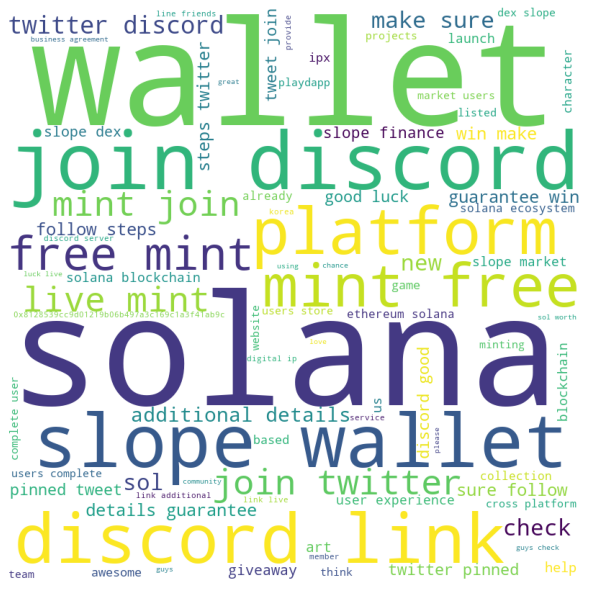

In [65]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for reddit_text in results['Processed']:
    # split the text into tokens
    tokens = reddit_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "

# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()